# Conversión de valores faltantes implícitos en explícitos

En la clase anterior vimos como codificar valores faltantes, ahora vamos a ver como convertir valores faltantes implícitos en explícitos.

Todo este tiempo hemos visto que representábamos a los valores faltantes de una única manera y después descubrimos que existen multiples formas de representarlos.

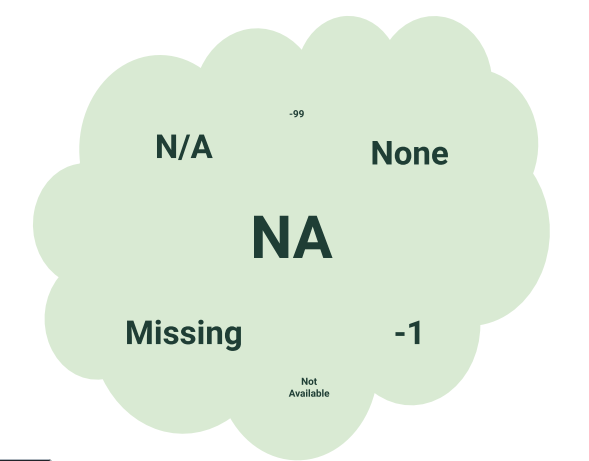

Pero que pasaría si un día llegamos, cargamos los datos y no vemos ningún valor faltante. Pensemos lo siguiente: *No tenemos valores faltantes puede seguir con el siguiente proceso y ya esta, no hay ningún inconveniente y todo es perfecto*.

Sin embargo los casos reales no son así, así que veamos con un ejemplo la siguiente imagen:

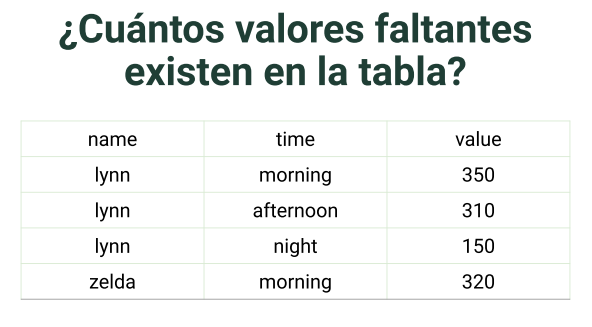

Ahora agregamos los siguientes datos:

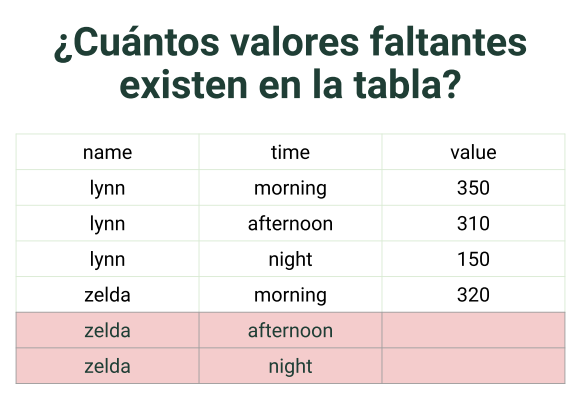

Analicemos y vemos que ambos casos tienen valores en `time` y también en `value`, pero para el caso de las filas en resaltado rojo, le faltan estos valores, así que cuando los resaltamos los convertimos en valores faltantes explícitos.

Ahora veamos como explorar este tipo de casos de valores faltantes.

## Conversion de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <br>
    <br>
    <p>
        <i>
        "<b>Implícito</b> se refiere a todo aquello que se entiende que está incluido
        pero sin ser expresado de forma directa o explícitamente."
        </i>
    </p>
    <p>
    Un <code>valor faltante implícito</code> indica que el valor faltante <b>debería estar incluido</b>
    en el conjunto de datos del análisis, <b>sin que éste lo diga</b> o lo <b>especifique</b>.
    Por lo general, son valores que podemos encontrar al pivotar nuestros datos
    o contabilizar el número de apariciones de combinaciones de las variables de estudio.
    </p>
</div>

### Importando librerías

In [1]:
### Importando librerías
import janitor      #Crear pipelines de limpieza de datos
import matplotlib.pyplot as plt
import missingno    #Visualizar valores faltantes 
import numpy as np
import pandas as pd
import pyreadr      #Leer archivos adr para este curso
import seaborn as sns
import session_info
import upsetplot    #Para gráfica de relaciones 
                    #de nuestros valores faltantes

### Configurar el aspecto general de las gráficas del proyecto

In [2]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

In [4]:
implicit_to_explicit_df = pd.DataFrame.from_dict(
    data={
        'name': ['lynn','lynn','lynn','zelda'],
        'time': ['morning','afternoon','night','morning'],
        'value':[350,310,np.nan,320]
    }
)
implicit_to_explicit_df

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0


Vemos una relación similar a la tabla anterior, en este caso si tenemos un valor faltante explicito para `lynn`. Lo que nos falta los valores faltantes implícitos para `zelda`.

Por lo que tenemos varios métodos para encontrarlos o identificarlos.

## Estrategias para identificación de valores faltantes implícitos

### Pivotar la tabla de datos

Con lo de pivotar nos referimos a hacer nuestra tabla más amplia y preservar una columna, en este caso el nombre (index) y su valor de `zelda` y después le preguntamos el origen de los nombres desde la columna `time`, después le decimos como queremos rellenar los valores

In [5]:
(
    implicit_to_explicit_df
    .pivot_wider(
        index = 'name',     #Le indicamos la columna name
        names_from = 'time', #columnas para obtener values
        values_from = 'value' #valores de las columnas
    )
)

/home/dens/miniforge3/envs/deteccion/lib/python3.9/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.pivot` instead.
  return method(self._obj, *args, **kwargs)


,name,afternoon,morning,night
0,lynn,310.0,350.0,NaN
1,zelda,NaN,320.0,NaN


como podemos ver de tener solo un valor faltante ahora tenemos 3, porque `zelda` posee valores faltantes que no se ven dentro del DataFrame y que son implícitos.

Así que este método fue a traves de pivotar una tabla:
> Pivotar quiere decir *tomar una columna de referencia y sobre otra extender sus valores- categorías y llenar los valores y espacios que le corresponden*.

De esta forma podemos ver que nos faltaban algunos valores sin necesidad de complicarnos.

### Cuantificar la ocurriencia de n-tuplas

Esta es otra forma de identificar valores faltantes implícitos.

**Cuantificar la ocurrencia de *n-tuplas*** se refiere a la ocurrencia de distintos valores, por ejemplo:     
Cuantas veces aparece `lynn` junto a `morning`, o cuantas veces aparece `lynn` en toda la tabla, cuantas veces aparece `zelda` en toda mi tabla.

¿será que todos deben aparecer las mismas veces?, si es así y uno no completa esto es que significa que falta algo.

In [6]:
(
    implicit_to_explicit_df
    .value_counts(
        subset=['name'] #Columna por la cual queremos cuantificar
    )
)

name 
lynn     3
zelda    1
Name: count, dtype: int64

El parámetro `subset` se refiere a la columna en la cual queremos cuantificar la ocurrencia de los valores.

Por lo que `lynn` aparece 3 veces y `zelda` aparece solo 1 vez. Bien ahora representemos lo anterior de forma tabular

In [7]:
(
    implicit_to_explicit_df
    .value_counts(
        subset=['name'] #Columna por la cual queremos cuantificar
    )
    .reset_index(name='n')
)

,name,n
0,lynn,3
1,zelda,1


Ahora podemos filtrar los resultados, entonces podemos ver que valores en `name` son faltantes.

In [8]:
(
    implicit_to_explicit_df
    .value_counts(
        subset=['name'] #Columna por la cual queremos cuantificar
    )
    .reset_index(name='n')
    .query('n<3')
)

,name,n
1,zelda,1


En esta clase logramos identificar los valores faltantes a traves de 2 mecanismos o métodos:
* Pivote de tablas: Me permite tener un indice y un pivote de columna para rellenar ciertos campos y ver si existían ciertos valores faltantes.
* Cuantificación de ocurrencia de n-tuplas: En esta nosotros preguntamos la frecuencia de aparición, en este caso el `nombre` de la tabla, si yo se que debería aparecer **3 veces**, cualquier otro caso que tenga menos de 3, ya estamos diciendo que nos faltan valores o datos y si en el caso de que falten mas, debemos estar analizando que es lo que esta pasando.

La ventaja de la segunda técnica sobre la primera, es que podemos combinar las variables que queramos, dado que el resultado siempre sera una tabla de 2 dimensiones, es decir no se requiere que se convierta en matriz.